<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Importando-e-Visualizando-os-Dados" data-toc-modified-id="Importando-e-Visualizando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importando e Visualizando os Dados</a></span></li><li><span><a href="#Treinando-um-Modelo" data-toc-modified-id="Treinando-um-Modelo-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Treinando um Modelo</a></span></li><li><span><a href="#Avaliando-Performance" data-toc-modified-id="Avaliando-Performance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Avaliando Performance</a></span></li><li><span><a href="#Melhorando-Performance" data-toc-modified-id="Melhorando-Performance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Melhorando Performance</a></span></li><li><span><a href="#Comparando-Modelos" data-toc-modified-id="Comparando-Modelos-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Comparando Modelos</a></span></li></ul></li></ul></div>

# Redes Neurais Artificiais

O objetivo deste notebook é viabilizar e testar aplicações, em Python, utilizando os algoritimos de Redes Neurais fornecidos pelo Scikit-Learn, como por exemplo, o ```MLPClassifier```.

## MNIST

Baseado nos procedimentos realizados no livro de Aurélien Géron, o dataset MNIST será importado e tratado para receber algoritmos baseados em Redes Neurais.

### Importando e Visualizando os Dados

In [4]:
# Importando bibliotecas e arquivos
import pandas as pd
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [5]:
# Separando dataset
data = mnist['data']
target = mnist['target']

In [6]:
# Verificando dimensões
print(f'Dimensões de "data": {data.shape}')
print(f'Dimensões de "target": {target.shape}')

Dimensões de "data": (70000, 784)
Dimensões de "target": (70000,)


Para separa o dataset MNIST em "treino" e "teste", é possível indexar as 60000 primeiras instâncias. Esta propriedade é característica do MNIST.

In [32]:
# Separando dataset em treino e teste
X_train, y_train, X_test, y_test = data[:60000], target[:60000], data[60000:], target[60000:]

In [33]:
# Verificando separação
print(f'Dimensões X_train: {X_train.shape}')
print(f'Dimensões y_train: {y_train.shape}')
print()
print(f'Dimensões X_test: {X_test.shape}')
print(f'Dimensões y_test: {y_test.shape}')

Dimensões X_train: (60000, 784)
Dimensões y_train: (60000,)

Dimensões X_test: (10000, 784)
Dimensões y_test: (10000,)


In [34]:
# Criando função para visualizar os dados
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

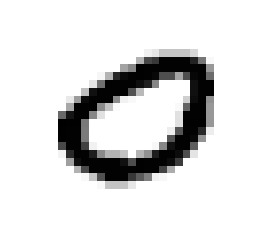

In [25]:
# Visualizando os dados
some_digit = X_train[987]
plot_digit(some_digit)

É necessário embaralhar os dados para evitar repetições sequenciais de uma mesma instância. Por exemplo:

In [35]:
# Quais dígitos estão alocados nas primeiras posições?
y_train[:1000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
# Embaralhando os dados
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [38]:
# Verificando
y_train[:10]

array([2., 3., 9., 3., 4., 7., 9., 5., 1., 4.])

Será que é possível saber quantas instâncias de cada numeral estão nos dados de treinamento?

In [41]:
# Verificando
print(f'Quantidade de 0s: {sum(y_train==0)}')
print(f'Quantidade de 1s: {sum(y_train==1)}')

Quantidade de 0s: 5923
Quantidade de 1s: 6742


In [44]:
# Criando função para retornar este resultado
def count_instances(data):
    range_instances = list(range(10))
    for instance in range_instances:
        print(f'Quantidade de {instance}s: {sum(y_train==instance)}')

In [45]:
# Chamando função
count_instances(y_train)

Quantidade de 0s: 5923
Quantidade de 1s: 6742
Quantidade de 2s: 5958
Quantidade de 3s: 6131
Quantidade de 4s: 5842
Quantidade de 5s: 5421
Quantidade de 6s: 5918
Quantidade de 7s: 6265
Quantidade de 8s: 5851
Quantidade de 9s: 5949


### Treinando um Modelo

Como dito anteriormente, o objetivo deste notebook é a familiarização com algoritmos de Redes Neurais. O primeiro (e único, até o momento) a ser utilizado será o ```MLPClassifier()```.

In [46]:
# Importando algoritmo
from sklearn.neural_network import MLPClassifier

# Criando classificador e treinando modelo
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

* Primeiro ponto a ser destacado: o treinamento possui relativa demora. Não aplicar ```cross_validation``` nesta máquina.
* Segundo ponto a ser destacado: **hiperparâmetros**.
* Terceiro ponto a ser destacado: hiperparâmetros **hidden_layer_sizes** e **alpha**.

### Avaliando Performance

In [47]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

y_pred = mlp_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 964,    0,    2,    1,    0,    4,    5,    1,    2,    1],
       [   1, 1112,    4,    0,    1,    0,    4,    0,   12,    1],
       [   5,    4,  984,    8,   11,    1,    3,    8,    5,    3],
       [   3,    2,    6,  970,    3,   14,    1,    4,    5,    2],
       [   1,    0,    2,    1,  945,    1,    6,    4,    5,   17],
       [   8,    0,    1,   27,    5,  832,   11,    0,    6,    2],
       [   9,    3,    0,    0,    5,   10,  929,    0,    2,    0],
       [   0,    5,   22,    6,   10,    0,    1,  972,    4,    8],
       [   6,    2,   11,   14,    2,    3,    4,    4,  923,    5],
       [   6,    2,    1,   12,   22,    1,    1,    7,    6,  951]],
      dtype=int64)

Os números parecem satisfatórios. Vamos avaliar a acurácia.

In [48]:
# Acurácia
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9582

In [50]:
# Aplicando cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(mlp_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.94781044, 0.93349667, 0.9453418 ])

Os valores são razoavelmente satisfatórios, visto que trata-se de um problema de classificação multiclasse.

In [52]:
# Aplicando cross_val_precit
from sklearn.model_selection import cross_val_predict

mlp_clf = MLPClassifier()
y_probas_mlp = cross_val_predict(mlp_clf, X_train, y_train, 
                                 cv=3, method='predict_proba')

In [56]:
y_probas_mlp[1]

array([6.41379887e-66, 6.89788205e-33, 2.33005247e-15, 1.00000000e+00,
       3.17577417e-57, 2.64489211e-22, 2.47310368e-81, 9.86934696e-39,
       4.05620181e-27, 1.12536009e-19])

In [58]:
# Verificando se realmente é o número 3
y_train[1]

3.0

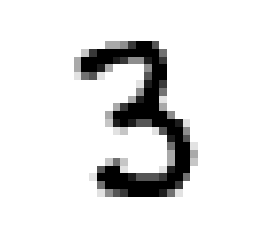

In [60]:
# Plotando
plot_digit(X_train[1])

### Melhorando Performance

In [61]:
# Aplicando Normalização
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype(np.float64))

# Realizando novo treinamento
cross_val_score(mlp_clf, X_train_scaled, y_train,
               cv=3, scoring='accuracy')

array([0.96180764, 0.9680484 , 0.96914537])

Ganhamos aproximadamente 2% de acurácia com a padronização dos dados.

In [70]:
# Verificando acurácia com dados de teste
mlp_clf = MLPClassifier()

X_test_scaled = std_scaler.fit_transform(X_test.astype(np.float64))
y_pred_scaled = cross_val_predict(mlp_clf, X_test_scaled, y_test, 
                                cv=3)

conf_mx = confusion_matrix(y_test, y_pred_scaled)
conf_mx

array([[ 960,    0,    0,    1,    2,    4,    6,    2,    4,    1],
       [   0, 1103,    7,    3,    1,    2,    3,    3,   12,    1],
       [  12,    3,  935,    7,   20,    4,    9,   23,   16,    3],
       [   2,    0,   18,  923,    0,   30,    0,   10,   12,   15],
       [   2,    3,    7,    0,  930,    0,   10,    6,    2,   22],
       [  10,    4,    5,   22,   16,  789,   21,    5,   13,    7],
       [  10,    3,    3,    1,   11,   10,  915,    1,    4,    0],
       [   3,   10,   10,    5,   12,    6,    0,  954,    5,   23],
       [   8,    6,   12,   13,   10,   16,    7,   10,  888,    4],
       [  11,    7,    1,   13,   19,   11,    2,   27,    8,  910]],
      dtype=int64)

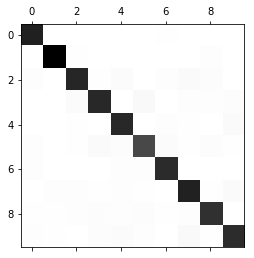

In [71]:
# Visualizando matriz graficamente
plt.figure(figsize=(12, 8))
plt.matshow(conf_mx, cmap='binary')
plt.show()

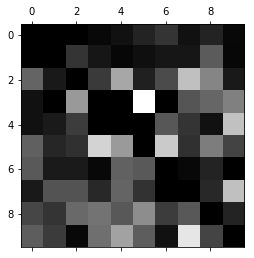

In [72]:
# Melhor visualização
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Comparando Modelos

In [74]:
# Bônus: comparando com matriz do classificados SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
y_pred_sgd = cross_val_predict(sgd_clf, X_test_scaled, y_test, cv=3)
conf_mx_sgd = confusion_matrix(y_test, y_pred_sgd)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\thiagoPan

In [75]:
# Comparando matrizes
print(f'MLP CLASSIFIER: \n{conf_mx}')
print()
print(f'SGD CLASSIFIER: \n{conf_mx_sgd}')

MLP CLASSIFIER: 
[[ 960    0    0    1    2    4    6    2    4    1]
 [   0 1103    7    3    1    2    3    3   12    1]
 [  12    3  935    7   20    4    9   23   16    3]
 [   2    0   18  923    0   30    0   10   12   15]
 [   2    3    7    0  930    0   10    6    2   22]
 [  10    4    5   22   16  789   21    5   13    7]
 [  10    3    3    1   11   10  915    1    4    0]
 [   3   10   10    5   12    6    0  954    5   23]
 [   8    6   12   13   10   16    7   10  888    4]
 [  11    7    1   13   19   11    2   27    8  910]]

SGD CLASSIFIER: 
[[ 951    0    2    3    5    9    6    1    3    0]
 [   0 1061   13    5    0    5    3    4   43    1]
 [   9    5  891   24   23    3   19   16   37    5]
 [   3    3   23  889    0   34    4   15   18   21]
 [   1    3   12    0  887    1   14    8   12   44]
 [  10    8    5   39   29  724   18   14   31   14]
 [  10    5    9    1   11   24  889    3    6    0]
 [   7   10   18    9   13    1    1  923    5   41]
 [  12   1

Análise: diagnoais do ```MLPClassifier``` possuem valores mais interessantes.

In [78]:
# Comparando acurácia com Random Forest
from sklearn.ensemble import RandomForestClassifier

# Treinando Random Forest
forest_clf = RandomForestClassifier()
y_pred_scores_forest = cross_val_score(forest_clf, X_test_scaled, y_test, 
                                       cv=3, scoring='accuracy')

# Treinando MLP
mlp_clf = MLPClassifier()
y_pred_scores_mlp = cross_val_score(mlp_clf, X_test_scaled, y_test, 
                                    cv=3, scoring='accuracy')

In [79]:
# Comparando valores
print(f'Acurácia média do modelo Random Forest: {y_pred_scores_forest.mean():.2f}')
print(f'Acurácia média do modelo MLP Classifier: {y_pred_scores_mlp.mean():.2f}')

Acurácia média do modelo Random Forest: 0.89
Acurácia média do modelo MLP Classifier: 0.93


Aumentando o número k de folds melhora em algo? Tentando com 7 folds.

In [80]:
# Aumentando cv
# Treinando Random Forest
forest_clf = RandomForestClassifier()
y_pred_scores_forest = cross_val_score(forest_clf, X_test_scaled, y_test, 
                                       cv=7, scoring='accuracy')

# Treinando MLP
mlp_clf = MLPClassifier()
y_pred_scores_mlp = cross_val_score(mlp_clf, X_test_scaled, y_test, 
                                    cv=7, scoring='accuracy')

# Comunicando resultados
print(f'Acurácia média do modelo Random Forest: {y_pred_scores_forest.mean():.2f}')
print(f'Acurácia média do modelo MLP Classifier: {y_pred_scores_mlp.mean():.2f}')

Acurácia média do modelo Random Forest: 0.91
Acurácia média do modelo MLP Classifier: 0.95


Aumento de dois pontos percentuais na acurácia de cada um dos modelos.

In [84]:
# Comparando com o aumento de hidden_layers
layers = 30

for number_layers in range(1, layers+1):
    # Criando classificador
    mlp_clf = MLPClassifier(hidden_layer_sizes=number_layers)
    
    # Treinando modelo e realizando predições
    mlp_clf.fit(X_train_scaled, y_train)
    y_pred_mlp = mlp_clf.predict(X_test_scaled)
    
    # Medindo acurácia
    acc = accuracy_score(y_test, y_pred_mlp)
    print(f'Resultado com {number_layers} camada(s) oculta(s): {acc:.2f}')

Resultado com 1 camada(s) oculta(s): 0.38


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Resultado com 2 camada(s) oculta(s): 0.68
Resultado com 3 camada(s) oculta(s): 0.82
Resultado com 4 camada(s) oculta(s): 0.87
Resultado com 5 camada(s) oculta(s): 0.88
Resultado com 6 camada(s) oculta(s): 0.91
Resultado com 7 camada(s) oculta(s): 0.92
Resultado com 8 camada(s) oculta(s): 0.93
Resultado com 9 camada(s) oculta(s): 0.94
Resultado com 10 camada(s) oculta(s): 0.93
Resultado com 11 camada(s) oculta(s): 0.94
Resultado com 12 camada(s) oculta(s): 0.94
Resultado com 13 camada(s) oculta(s): 0.94
Resultado com 14 camada(s) oculta(s): 0.94
Resultado com 15 camada(s) oculta(s): 0.95
Resultado com 16 camada(s) oculta(s): 0.94
Resultado com 17 camada(s) oculta(s): 0.95
Resultado com 18 camada(s) oculta(s): 0.94
Resultado com 19 camada(s) oculta(s): 0.95
Resultado com 20 camada(s) oculta(s): 0.94
Resultado com 21 camada(s) oculta(s): 0.95
Resultado com 22 camada(s) oculta(s): 0.95
Resultado com 23 camada(s) oculta(s): 0.95
Resultado com 24 camada(s) oculta(s): 0.95
Resultado com 25 ca

Considerações: demorou aproximadamente 40 minutos para a realização de todos os treinamentos. O padrão, para o MLP, é de 100 hidden_layers.